In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import img_as_bool

%matplotlib inline

2024-05-18 23:57:15.279308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 23:57:15.418697: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


2024-05-18 23:57:17.232376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 23:57:17.252184: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-18 23:57:17.345299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-18 23:57:17.345469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), bu

(2048, 2048)
(34, 34)


(array([ 0.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

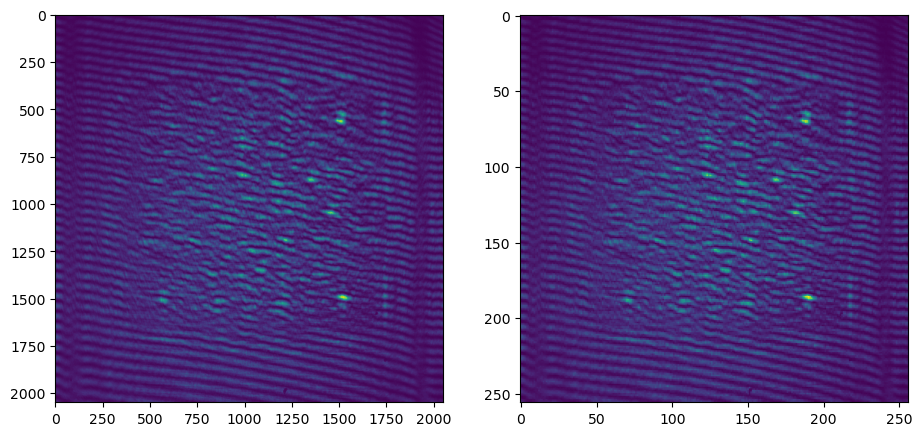

In [3]:
holo_path = '/home/drozdovmk/holo_data/25_inline/HOLO_25_inline/'
qr_path = '/home/drozdovmk/holo_data/25_inline/QR_25_inline/'

files = os.listdir(qr_path)
image = cv2.imread(qr_path + '0.png', cv2.IMREAD_GRAYSCALE)
holo = cv2.imread(holo_path + '0.png',cv2.IMREAD_GRAYSCALE )
# Display the image
fig,ax = plt.subplots(1,2, figsize = (11,8))
print(holo.shape)
print(image.shape)
ax[0].imshow(holo)
# ax[1].imshow(image)

ax[1].imshow(cv2.resize(holo, (256,256),) )
plt.hist(image[0])


In [22]:
random_seed = 44
qr_train, qr_val = tf.keras.preprocessing.image_dataset_from_directory(qr_path, labels = None,
                                                    color_mode = 'grayscale', batch_size = 2, image_size = (64, 64),
                                                    subset = 'both', validation_split=0.15, seed = random_seed, crop_to_aspect_ratio = True)
holo_train, holo_val = tf.keras.preprocessing.image_dataset_from_directory(holo_path, labels = None,
                                                    color_mode = 'grayscale', batch_size = 2, image_size = (512, 512),
                                                    subset = 'both', validation_split=0.15, seed = random_seed)


Found 9994 files belonging to 1 classes.
Using 8495 files for training.
Using 1499 files for validation.
Found 9994 files belonging to 1 classes.
Using 8495 files for training.
Using 1499 files for validation.


In [23]:
for holo_train_batch, qr_train_batch in zip(holo_train, qr_train):
    print(holo_train_batch.shape, qr_train_batch.shape)
    break

(2, 512, 512, 1) (2, 64, 64, 1)


In [24]:
from unet_keras import unet_keras
unet = unet_keras()
unet.predict(holo_train_batch).shape

2024-05-19 00:08:46.841321: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 512.00MiB (rounded to 536870912)requested by op AddV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-05-19 00:08:46.841389: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2024-05-19 00:08:46.841408: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 52, Chunks in use: 52. 13.0KiB allocated for chunks. 13.0KiB in use in bin. 5.2KiB client-requested in use in bin.
2024-05-19 00:08:46.841421: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 20, Chunks in use: 20. 10.0KiB allocated for chunks. 10.0KiB in use in bin. 10.0KiB client-requested in use in bin.
2024-05-19 00:08:46.841432: I tensorflow/tsl/framework/

ResourceExhaustedError: in user code:

    File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ResourceExhaustedError: Exception encountered when calling layer 'unet_keras_4' (type unet_keras).
    
    in user code:
    
        File "/home/drozdovmk/Projects/Holograms/workspace/unet_keras.py", line 46, in call  *
            x = self.down_convolution_4(x)
        File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/home/drozdovmk/anaconda3/envs/holo/lib/python3.9/site-packages/keras/backend.py", line 2100, in random_uniform
            return tf.random.stateless_uniform(
    
        ResourceExhaustedError: Exception encountered when calling layer 'sequential_43' (type Sequential).
        
        {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]
        
        Call arguments received by layer 'sequential_43' (type Sequential):
          • inputs=tf.Tensor(shape=(None, 64, 64, 256), dtype=float32)
          • training=False
          • mask=None
    
    
    Call arguments received by layer 'unet_keras_4' (type unet_keras):
      • inputs=tf.Tensor(shape=(None, 512, 512, 1), dtype=float32)
      • training=False


In [21]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

get_model_memory_usage(32, unet)

AttributeError: The layer "max_pooling2d_3" has never been called and thus has no defined output shape.

In [20]:
for l in unet.layers:
    print(l)